<a href="https://colab.research.google.com/github/SemihAkkoc/machine_learning/blob/main/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading the dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# normalizing the pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

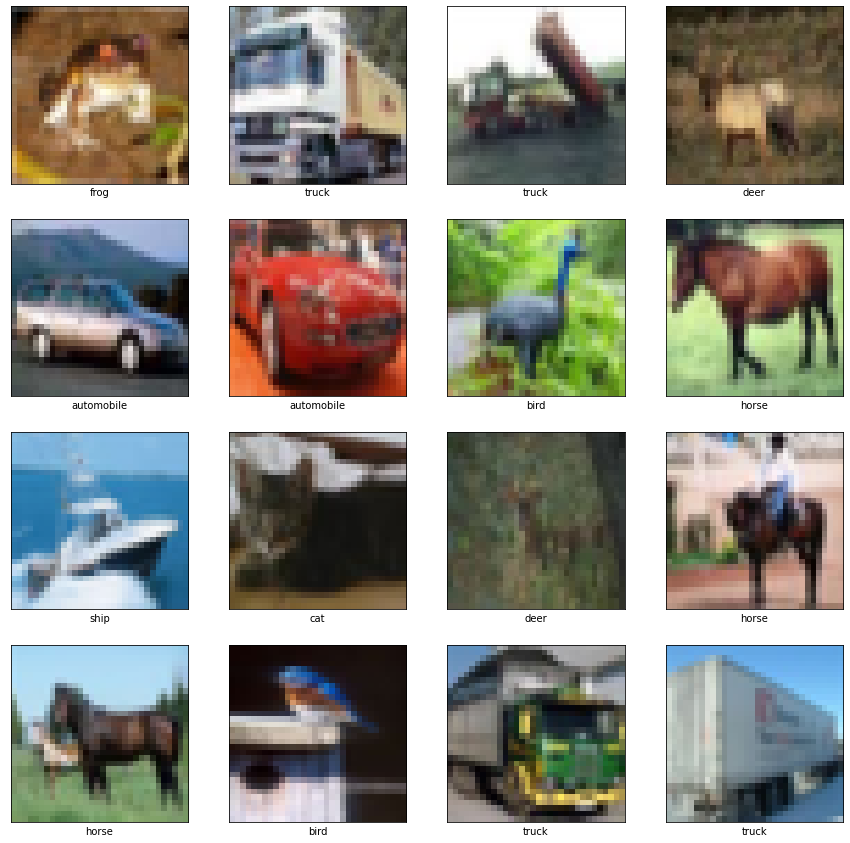

In [3]:
# to visualize the dataset
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
    plt.xticks([])
    plt.yticks([])
plt.show()

# **CNN Architecture**

A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

**Layer 1:**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2:**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers:**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [4]:
# creating the model        # here we defined the amount of filters 32 and sample size (3,3)
model = keras.models.Sequential([keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                keras.layers.MaxPooling2D((2, 2)),
                                keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                keras.layers.MaxPooling2D((2, 2)),
                                keras.layers.Conv2D(64, (3, 3), activation='relu')])

model.summary()  # summary of the model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [5]:
# adding dense layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

# defining the optimizer and loss function
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [6]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5482 - accuracy: 0.4272
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1785 - accuracy: 0.5785
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0192 - accuracy: 0.6411
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9175 - accuracy: 0.6780
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8361 - accuracy: 0.7066
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7803 - accuracy: 0.7255
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7289 - accuracy: 0.7433
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6855 - accuracy: 0.7600
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6417 - accuracy: 0.7762
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [7]:
# evaluating the model
test_accuracy = model.evaluate(test_images, test_labels)
print(f'Models test accuracy is: {test_accuracy[1]:0.2f}')

313/313 [==============================] - 4s 12ms/step - loss: 0.9571 - accuracy: 0.6806
Models test accuracy is: 0.68


In [8]:
predictions = model.predict([test_images])

accuracy out of 16 is 0.75


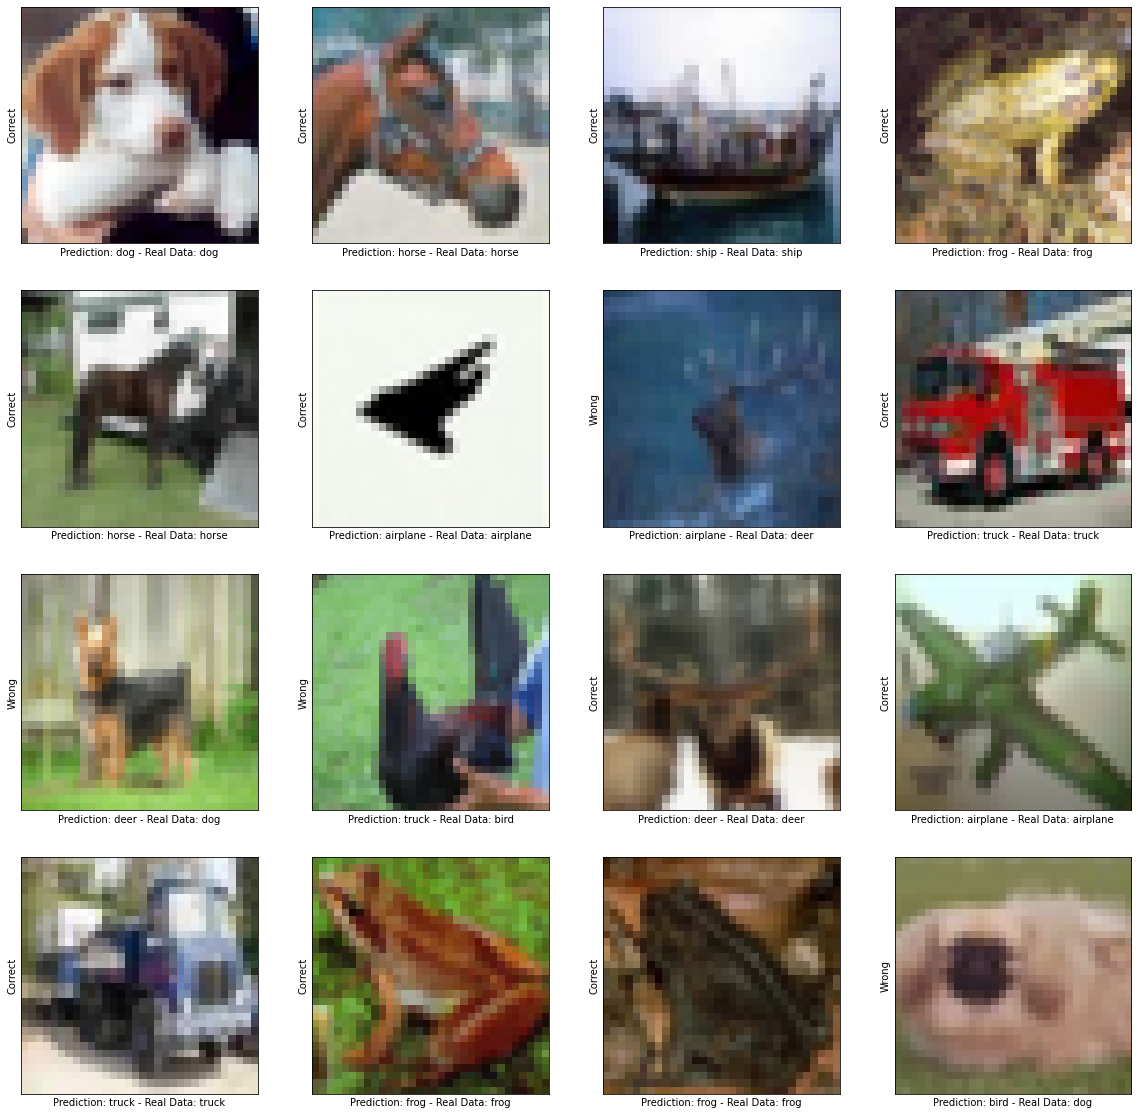

accuracy out of 16 is 0.56


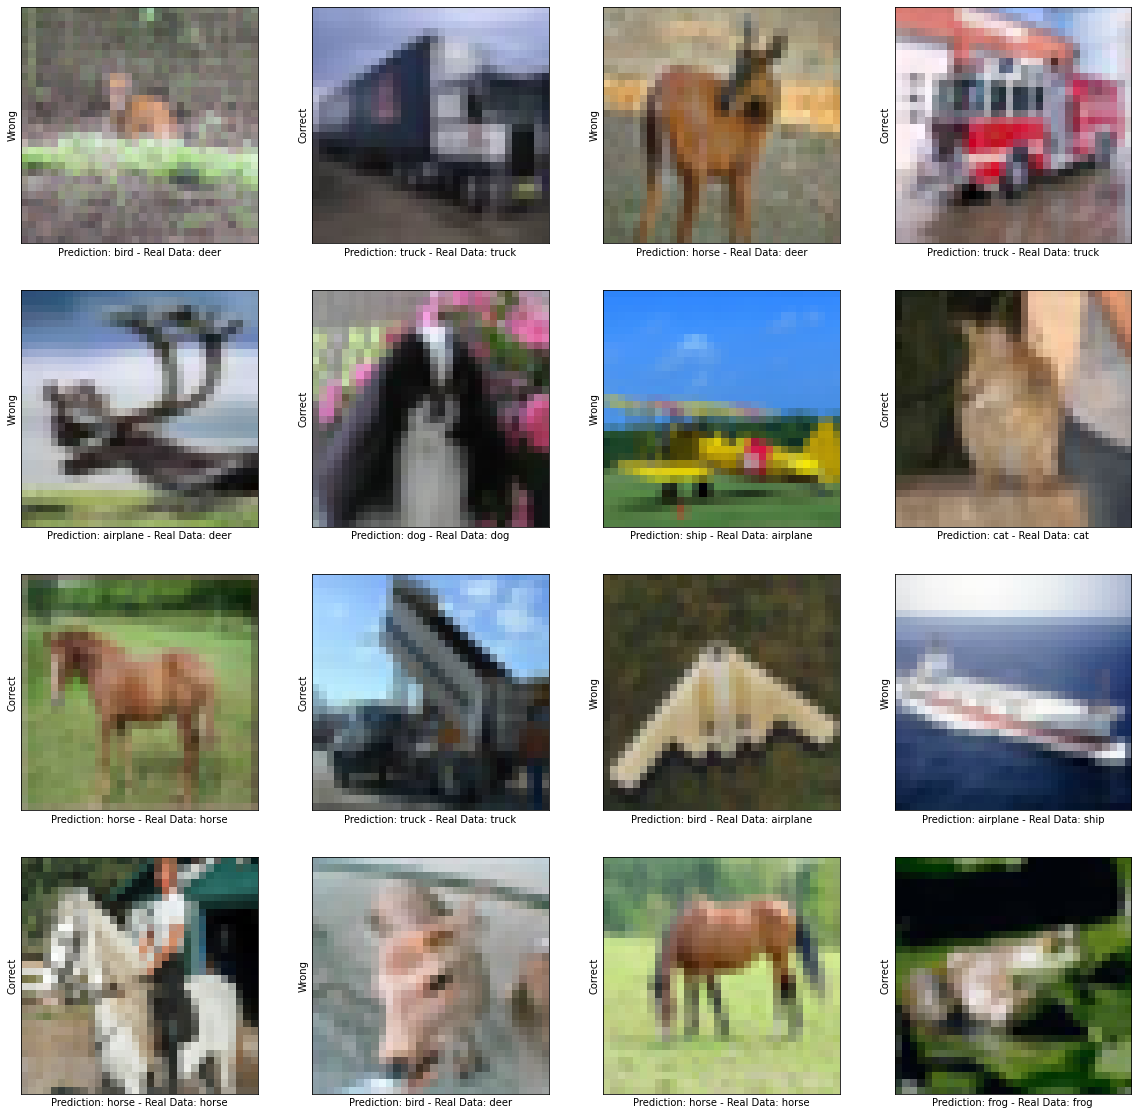

In [9]:
import time
from math import sqrt

NUM = 16
for j in range(2):
    # plt.clf()
    plt.figure(j,figsize=(20,20))
    correct = 0
    for i in range(NUM):
        plt.subplot(sqrt(NUM), sqrt(NUM), i+1)
        k = (j+1)*(NUM+i)
        plt.imshow(test_images[k], cmap=plt.cm.binary)
        plt.xlabel(f'Prediction: {class_names[np.argmax(predictions[k])]} - Real Data: {class_names[test_labels[k][0]]}')
        plt.xticks([])
        plt.yticks([])
        if np.argmax(predictions[k]) == test_labels[k][0]:
            plt.ylabel('Correct')
            correct += 1
        else:
            plt.ylabel('Wrong')
    print(f'accuracy out of {NUM} is {correct/NUM:.2f}')
    plt.show()
    time.sleep(5)